# Playing with Output Spectra

In [29]:
# import classy module
from classy import Class

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [16]:
# create instance of the class "Class"
LambdaCDM = Class()
# pass input parameters
LambdaCDM.set({'omega_b':0.022032,'omega_cdm':0.12038,'h':0.67556,'A_s':2.215e-9,'n_s':0.9619,'tau_reio':0.0925})
LambdaCDM.set({'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':3.0})

# run class
LambdaCDM.compute()

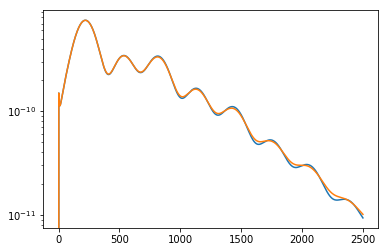

In [36]:
cls_unlensed = LambdaCDM.raw_cl(2500)
cls_lensed   = LambdaCDM.lensed_cl(2500)

ll_vec = cls_unlensed['ell']

plt.figure()

ax = plt.gca()

ax.set_yscale('log')

plt.plot(ll_vec, ll_vec*(ll_vec + 1)/(2*np.pi)*cls_unlensed['tt'])
plt.plot(ll_vec, ll_vec*(ll_vec + 1)/(2*np.pi)*cls_lensed['tt'])

In [76]:
# create instance of the class "Class"
LambdaCDM_tensor = Class()
# pass input parameters
LambdaCDM_tensor.set({
    'omega_b':0.022032,'omega_cdm':0.12038,'h':0.67556,'A_s':2.215e-9,'n_s':0.9619,'tau_reio':0.0925,
    'modes':'s,t', 'r':0.1
})
LambdaCDM_tensor.set({'output':'tCl,pCl,lCl,mPk','lensing':'yes','non linear':'halofit', 'P_k_max_1/Mpc':3.0, 'l_max_tensors':500})

# run class
LambdaCDM_tensor.compute()

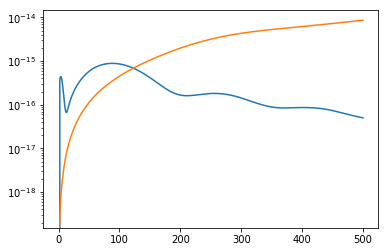

In [77]:
cls_tensor_unlensed   = LambdaCDM_tensor.raw_cl(500)
cls_tensor_lensed     = LambdaCDM_tensor.lensed_cl(500)

ll_vec = cls_tensor_lensed['ell']

plt.figure()

ax = plt.gca()

ax.set_yscale('log')

plt.plot(ll_vec, ll_vec*(ll_vec + 1)/(2*np.pi)*cls_tensor_unlensed['bb'])
plt.plot(ll_vec, ll_vec*(ll_vec + 1)/(2*np.pi)*(cls_tensor_lensed['bb'] - cls_tensor_unlensed['bb']))


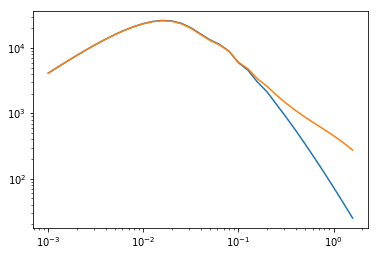

In [80]:
k_vec = 10**np.arange(-3, 0.3, 0.1)
h = LambdaCDM_tensor.h()
lin_power_spec_z_0 = [LambdaCDM_tensor.pk_lin(k*h,0)*h**3 for k in k_vec]
nonlin_power_spec_z_0 = [LambdaCDM_tensor.pk(k*h,0)*h**3 for k in k_vec]

plt.figure()

plt.loglog()

plt.plot(k_vec, np.array(lin_power_spec_z_0))
plt.plot(k_vec, nonlin_power_spec_z_0)

In [83]:
LambdaCDM = Class()
# pass input parameters
LambdaCDM.set({'omega_b':0.022032,'omega_cdm':0.12038,'h':0.67556,'A_s':2.215e-9,'n_s':0.9619,'tau_reio':0.0925})

LambdaCDM.compute()

In [87]:
therm = LambdaCDM.get_thermodynamics()
therm.keys()

dict_keys(['z', 'conf. time [Mpc]', 'x_e', "kappa' [Mpc^-1]", 'exp(-kappa)', 'g [Mpc^-1]', 'Tb [K]', 'c_b^2', 'tau_d'])

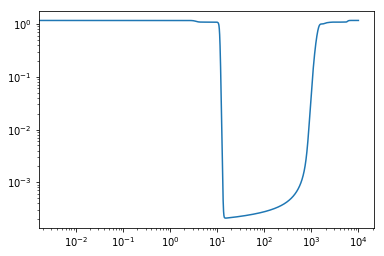

In [88]:
plt.figure()

plt.loglog()

plt.plot(therm['z'], therm['x_e'])

In [149]:
LambdaCDM_perturb = Class()
# pass input parameters
# LambdaCDM_perturb.set({'omega_b':0.022032,'omega_cdm':0.12038,'h':0.67556,'A_s':2.215e-9,'n_s':0.9619,'tau_reio':0.0925})
LambdaCDM_perturb.set({'h':0.5, 'Omega_cdm':1 - 0.06, 'Omega_b':0.06})
LambdaCDM_perturb.set({'output':'tCl', 'k_output_values':'7e-4, 0.022, 0.034, 0.045'})

LambdaCDM_perturb.compute()



In [150]:
perturb = LambdaCDM_perturb.get_perturbations()

In [151]:
perturb['scalar'][3].keys()

dict_keys(['tau [Mpc]', 'a', 'delta_g', 'theta_g', 'shear_g', 'pol0_g', 'pol1_g', 'pol2_g', 'delta_b', 'theta_b', 'psi', 'phi', 'delta_ur', 'theta_ur', 'shear_ur', 'delta_cdm', 'theta_cdm'])

In [152]:
tau     = [perturb['scalar'][i]['tau [Mpc]'] for i in np.arange(4)]
delta_g = [perturb['scalar'][i]['delta_g'] for i in np.arange(4)]
psi     = [perturb['scalar'][i]['psi'] for i in np.arange(4)]

In [153]:
tau_rec = LambdaCDM_perturb.get_current_derived_parameters(['tau_rec'])
tau_rec = tau_rec['tau_rec']

[0.1, 1, -1, 1]

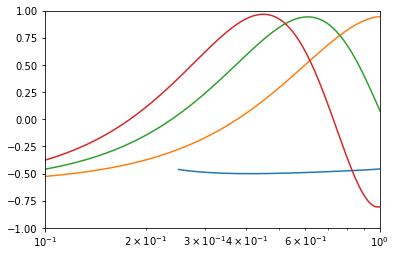

In [154]:
plt.figure()

ax = plt.gca()

ax.set_xscale('log')

for i in np.arange(4):
    plt.plot(tau[i]/tau_rec, -2*(0.25*delta_g[i] + psi[i]))

plt.axis([0.1, 1, -1, 1])